# Graphing nationality

Our goal here is

1. To count up the books ascribed to different nationalities.

2. To graph the uk proportion over time.

First let's import modules you need.

In [2]:
# familiar pandas
import pandas as pd

# we'll need this for visualization
from matplotlib import pyplot as plt

# you won't need to say this if you're doing it in spyder
%matplotlib inline

## read in the data

Right now we'll just use Patrick's data; we can add Jessica's as it's available.


In [11]:
# I use df as the variable name because it's a
# pandas DataFrame.

df = pd.read_csv('patrick.tsv', sep = '\t')

In [12]:
df.head()

,docid,author,realname,pseudonym,gender,nationality,authordate,inferreddate,firstpub,latestcomp,allcopiesofwork,copiesin25yrs,enumcron,imprint,genres,subjects,category,shorttitle
0,nyp.33433076025596,"M'Henry, James","McHenry, James",NaN,m,us,1785-1845.,1848,1823.0,1845,1,1,v. 1-2,Pittsburgh;M. P. Morse;18,NaN,1732-1799|Fiction|Washing,novel,"The wilderness : or, Braddock's times; A tale ..."
1,wu.89087902169,"Applin, Arthur",NaN,"Smith, Julian",m,uk,1883-,1929,NaN,1929,1,1,NaN,New York|H. Liveright|192,NotFiction,NaN,novel,The chronicles of a gigolo
2,uc1.$b323629,"March, William",NaN,NaN,m,us,1893-1954.,1939,NaN,1939,2,2,NaN,"Boston|Little, Brown and",NotFiction,NaN,shortstories,Some like them short
3,uc1.$b318317,"Rosny, J. H., aÃ®nÃ©, pseud. of J. H. BoÃ«x","Boex, Joseph Henri Honoré",Rosny aîné,m,fr,1856-1940.,1924,NaN,1924,1,1,NaN,New York|R. M. McBride|19,NotFiction,NaN,novel,"The giant cat; or, The quest of Aoun and Zouhr"
4,mdp.39015005144137,"von Strassburg, Gottfried",NaN,NaN,NaN,NaN,d. 1210,1960,NaN,1960,1,1,NaN,Baltimore|Penguin Books|1,NotFiction,Tristan|(Anglo-Norman poe,reprint,Tristan


In [5]:
df.columns

Index(['Unnamed: 0', 'docid', 'author', 'realname', 'pseudonym', 'gender',
       'nationality', 'authordate', 'inferreddate', 'firstpub', 'latestcomp',
       'allcopiesofwork', 'copiesin25yrs', 'enumcron', 'imprint', 'genres',
       'subjects', 'category', 'shorttitle'],
      dtype='object')

## table of nationalities

Let's start by just counting how many we've got.

We'll do it using a dictionary.

In [6]:
nationalities = dict()

for n in df.nationality:
    if pd.isnull(n):
        continue
    elif n in nationalities:
        # oh, we already have this one in the dictionary
        nationalities[n] = nationalities[n] + 1
        # just add one to the count
    else:
        # not in the dictionary; have to initialize it
        nationalities[n] = 1


In [7]:
# how many different codes are there?

print(len(nationalities))

36


In [8]:
# notice that you iterate through dictionaries
# in a special way, using the .items() method

for nationality, count in nationalities.items():
    print(nationality, count)

nic 1
au 10
ar 1
in 6
gr 1
tr 1
jp 1
it 1
sa 8
ni 2
cl 1
us 214
den 1
es 2
cmr 1
me 2
aus 1
ph 1
ba 1
ru 6
ukr 1
tri 1
nz 3
fr 25
tu 1
ca 7
nor 1
de 9
uk 234
pr 1
ir 21
arm 1
no 1
gk 1
lit 1
sw 3


## Graphing the uk fraction

Okay, now let's graph the fraction of "uk" nationalities across time. We're going to add a bit of complexity to count Scotland as part of UK. We're also only going to count rows where category == 'novel.'

In [9]:
# we create a set so we can check whether
# a nationality is one of these

united_kingdom = {'uk', 'scott', 'scot'}

# We need to keep track of nationalities
# in multiple periods, so let's create a dictionary
# of periods.

half_centuries = dict()

# Then for each period, let's create a dictionary
# that we can use to count uk or non-uk writers.

for floor in range(1800, 2050, 50):
    half_centuries[floor] = dict()
    half_centuries[floor]['uk'] = 0
    half_centuries[floor]['non-uk'] = 0
    
    # we're initializing the 'uk' and
    # 'non-uk' categories in advance rather
    # than doing it on the fly like we did
    # before -- mainly because there are only
    # 2 categories so it's simple.

# now iterate through the data

for idx, row in df.iterrows():
    if row.category != 'novel':
        continue
        # not going to count things that
        # aren't novels
    else:
        date = row.inferreddate
        halfcent = (date // 50) * 50
        # play with // in spyder to 
        # understand what this does
        # try, e.g. 223 // 50 or 
        # 223 // 10.
    
    if halfcent not in half_centuries:
        print('error: ', halfcent)
        # this should never happen
        continue
    
    if row.nationality in united_kingdom:
        half_centuries[halfcent]['uk'] += 1
    else:
        half_centuries[halfcent]['non-uk'] += 1

        
        

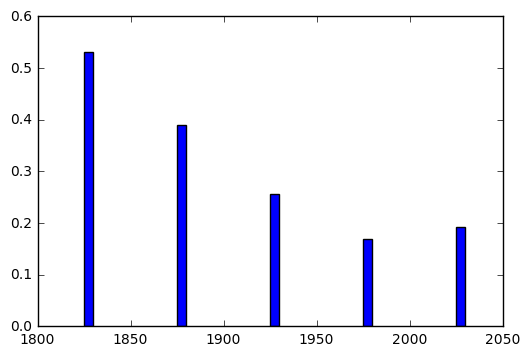

In [10]:
x = []
y = []

for halfcent, nationalitydict in half_centuries.items():
    x.append(halfcent + 25)
    y.append(nationalitydict['uk'] / 
             (nationalitydict['uk'] + nationalitydict['non-uk']))

plt.bar(x, y, width = 5)
plt.show()

In [14]:
men = 0
women = 0

for g in df['gender']:
    if pd.isnull(g):
        continue
    elif g == 'm':
        men += 1
    elif g == 'f':
        women += 1
    else:
        continue

print('men', men)
print('women', women)




men 423
women 234


In [16]:
sum(df['gender'] == 'f')


234